In [30]:
import pandas as pd
import math
import numpy as np

In [77]:
def read_csv_file(filename):
    df = pd.read_csv(filename)
    print(df.info())
    return  df

In [78]:

df = read_csv_file('train.csv')
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
None


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
def drop_columns(df , columns):
    new_df = df.drop(columns =columns, axis = 1)
    return new_df

In [6]:
columns_to_be_dropped = ['employee_id' , 'recruitment_channel', 'age' ,'gender','education','awards_won?']
new_df = drop_columns(df, columns_to_be_dropped)
new_df.head()


,department,region,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,Sales & Marketing,region_7,1,5.0,8,1,49,0
1,Operations,region_22,1,5.0,4,0,60,0
2,Sales & Marketing,region_19,1,3.0,7,0,50,0
3,Sales & Marketing,region_23,2,1.0,10,0,50,0
4,Technology,region_26,1,3.0,2,0,73,0


In [7]:
new_df.isnull().sum()

department                 0
region                     0
no_of_trainings            0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
X = [] 
X = new_df.values.tolist()


In [9]:
def count_non_null_in_list(X , col_id):
    k=0
    for row in X:
        if math.isnan(row[3]) == True:
            k= k+1
    return k
    
count_non_null_in_list(X , 3)

4124

In [11]:
def do_missing_transformation(X, test_time=False):
    if test_time==False:
        for row in X:
            if math.isnan(row[3]) == True and row[7] == 1:
                row[3] = 5.0
            elif math.isnan(row[3]) == True:
                row[3] = 3.0
    else:
        for row in X:
            if math.isnan(row[3]) == True:
                row[3] = 3.0

do_missing_transformation(X)

In [12]:
count_non_null_in_list(X, 3)

0

In [14]:
df_visual = pd.DataFrame(X)
df_visual.head()

,0,1,2,3,4,5,6,7
0,Sales & Marketing,region_7,1,5.0,8,1,49,0
1,Operations,region_22,1,5.0,4,0,60,0
2,Sales & Marketing,region_19,1,3.0,7,0,50,0
3,Sales & Marketing,region_23,2,1.0,10,0,50,0
4,Technology,region_26,1,3.0,2,0,73,0


In [95]:
import numpy as np

def get_features_and_labels(X):
    X = np.array(X)
    labels = X[:,-1]
    X = X[:,:-1]
    return X, labels

X, labels = get_features_and_labels(X)

In [126]:
X

array([['Sales & Marketing', 'region_7', '1', ..., '1', '0', '49'],
       ['Operations', 'region_22', '1', ..., '0', '0', '60'],
       ['Sales & Marketing', 'region_19', '1', ..., '0', '0', '50'],
       ...,
       ['Analytics', 'region_1', '1', ..., '1', '0', '79'],
       ['Sales & Marketing', 'region_9', '1', ..., '0', '0', '45'],
       ['HR', 'region_22', '1', ..., '0', '0', '49']], dtype='<U17')

# Visualization

In [18]:

df_visual = df_visual.rename(columns={
    0:'department',
    1:'region',
    2:'trainings',
    3:'rating',
    4:'serivce',
    5:'kpi',
    6:'score',
    7:'promoted'
})
df_visual.head()

,Department,region,trainings,rating,serivce,kpi,score,promoted
0,Sales & Marketing,region_7,1,5.0,8,1,49,0
1,Operations,region_22,1,5.0,4,0,60,0
2,Sales & Marketing,region_19,1,3.0,7,0,50,0
3,Sales & Marketing,region_23,2,1.0,10,0,50,0
4,Technology,region_26,1,3.0,2,0,73,0


In [15]:
df_visual.dtypes

0     object
1     object
2      int64
3    float64
4      int64
5      int64
6      int64
7      int64
dtype: object

In [21]:
# check what is the promotion rate. Same rate has to be there in cross validation
promotion_rate = df_visual.promoted.value_counts() / len(df_visual)
promotion_rate

0    0.91483
1    0.08517
Name: promoted, dtype: float64

## Only 8.5 % of the people have been promoted according to the data 

In [22]:
df_visual.describe()

,trainings,rating,serivce,kpi,score,promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,3.316852,5.865512,0.351974,63.386750,0.085170
std,0.609264,1.221770,4.265094,0.477590,13.371559,0.279137
min,1.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,4.000000,7.000000,1.000000,76.000000,0.000000
max,10.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [24]:
promoted = df_visual.groupby('promoted')
promoted.mean()

,trainings,rating,serivce,kpi,score
promoted,,,,,
0,1.257639,3.247686,5.879398,0.319685,62.647686
1,1.203299,4.059769,5.716367,0.698800,71.325193


## Heatmap

           trainings    rating   serivce       kpi     score  promoted
trainings   1.000000 -0.061298 -0.057275 -0.045576  0.042517 -0.024896
rating     -0.061298  1.000000  0.011819  0.342857  0.077982  0.185536
serivce    -0.057275  0.011819  1.000000 -0.077693 -0.038122 -0.010670
kpi        -0.045576  0.342857 -0.077693  1.000000  0.078391  0.221582
score       0.042517  0.077982 -0.038122  0.078391  1.000000  0.181147
promoted   -0.024896  0.185536 -0.010670  0.221582  0.181147  1.000000


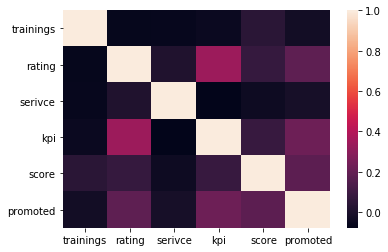

In [29]:
import seaborn as sns

corr= df_visual.corr()
print(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 1. rating and kpi are strongly correlated to each other. It means people who have good ratings are the ones who have achieved their KPI's
### 2. rating, kpi and training score are the factors that contribute higly towards our target variable promotion


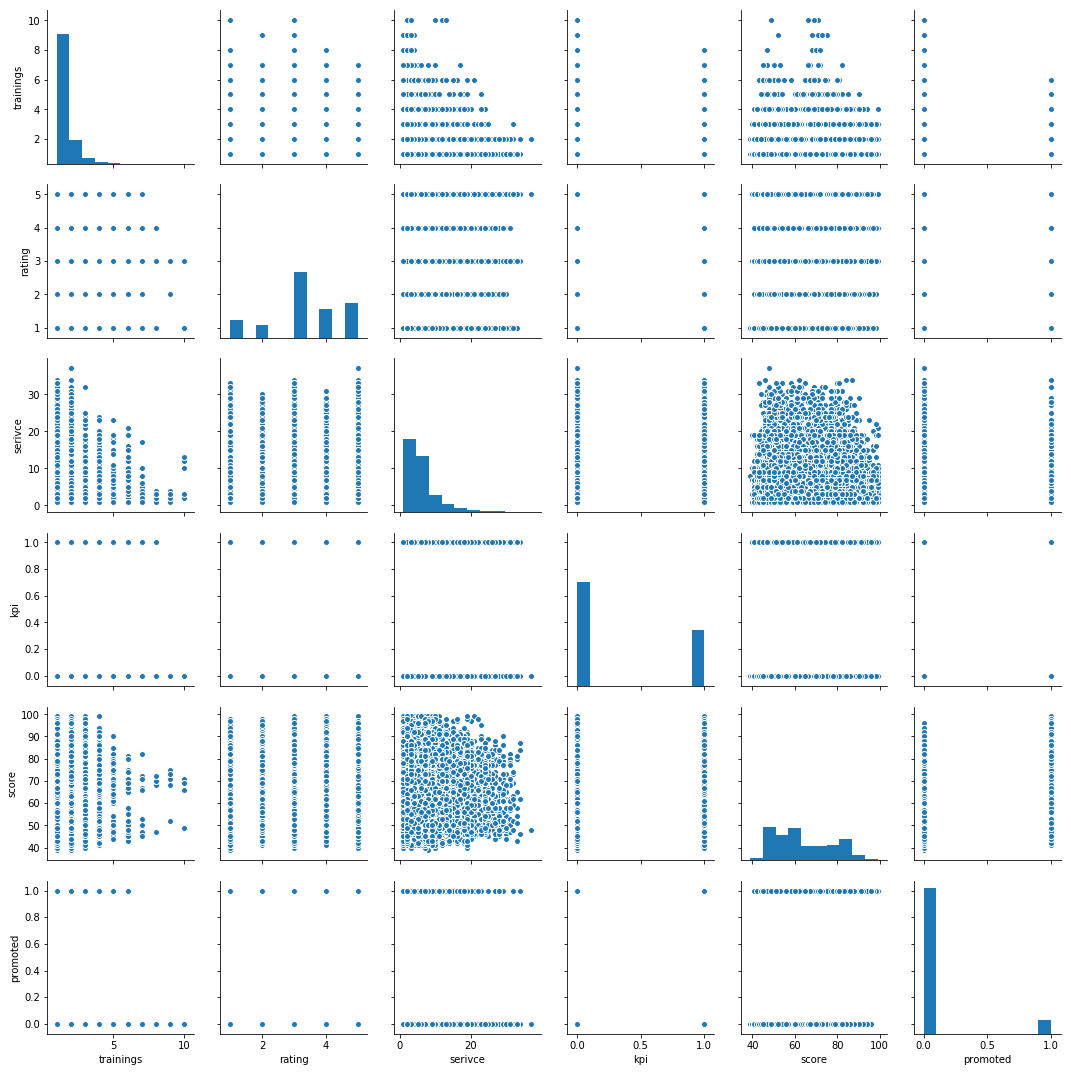

In [31]:
sns.pairplot(df_visual)

c:\users\kanwal\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\kanwal\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\kanwal\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Employee Count')

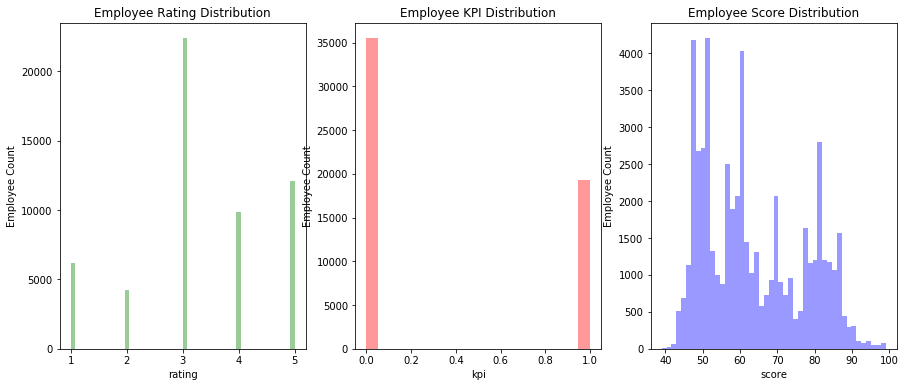

In [35]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df_visual.rating, kde=False, color="g", ax=axes[0]).set_title('Employee Rating Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df_visual.kpi, kde=False, color="r", ax=axes[1]).set_title('Employee KPI Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df_visual.score, kde=False, color="b", ax=axes[2]).set_title('Employee Score Distribution')
axes[2].set_ylabel('Employee Count')


## Promotion vs Department

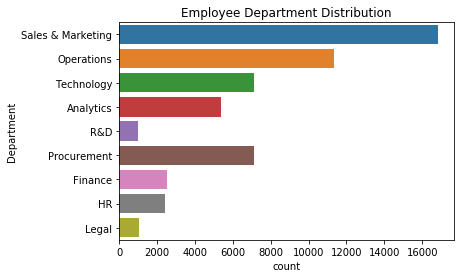

In [43]:
sns.countplot(y='Department', data=df_visual).set_title('Employee Department Distribution');

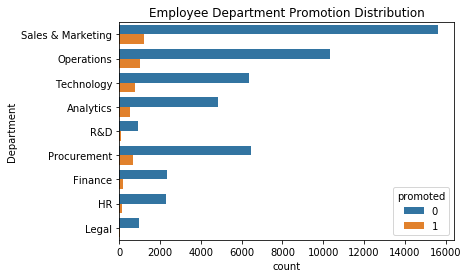

In [45]:
sns.countplot(y='Department', hue='promoted', data=df_visual).set_title('Employee Department Promotion Distribution');

In [64]:
promot_dept = df_visual.groupby(['Department'])
promot_dept.promoted.mean()*100

Department
Analytics             9.566517
Finance               8.123028
HR                    5.624483
Legal                 5.101059
Operations            9.014804
Procurement           9.638554
R&D                   6.906907
Sales & Marketing     7.203088
Technology           10.759316
Name: promoted, dtype: float64

### Promotion Rates according to department

Department
Analytics             9.566517
Finance               8.123028
HR                    5.624483
Legal                 5.101059
Operations            9.014804
Procurement           9.638554
R&D                   6.906907
Sales & Marketing     7.203088
Technology           10.759316

### Technology is the department which has the highest promotion rate. Sales and Marketing have the maximum number of people

### Promotion vs Region

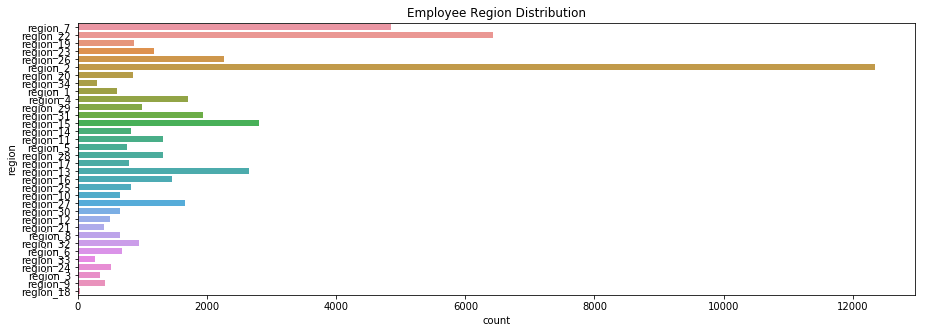

In [66]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y='region', data=df_visual).set_title('Employee Region Distribution');


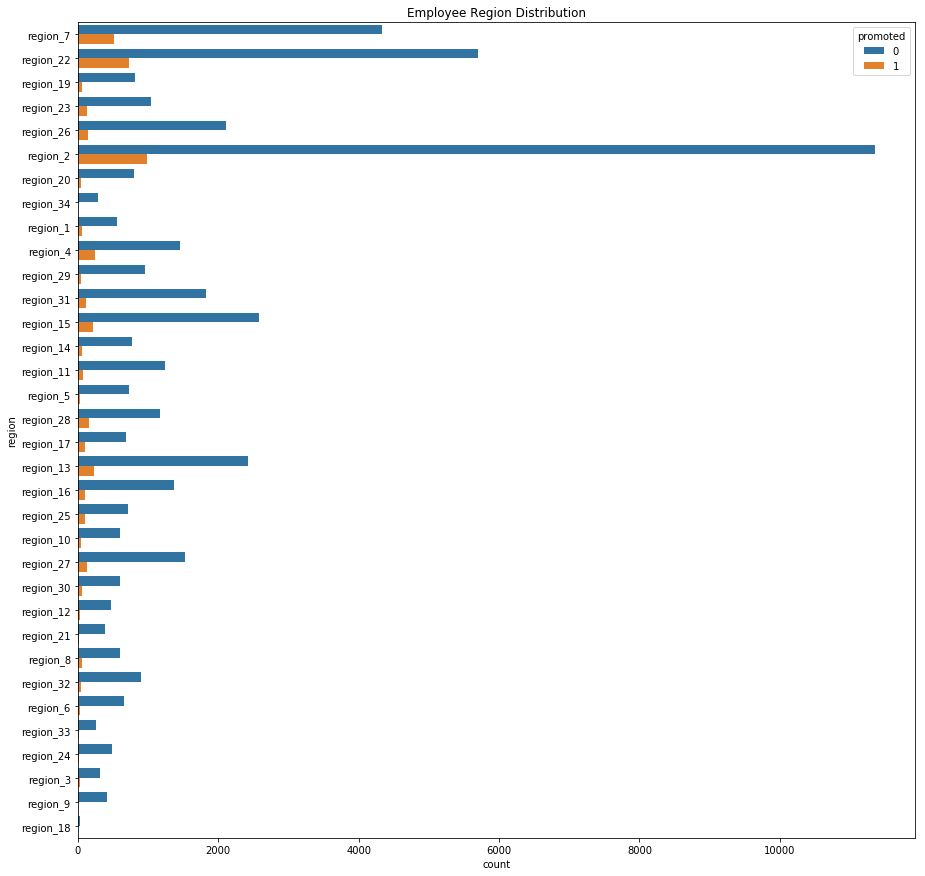

In [72]:
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(y='region', hue='promoted', data=df_visual).set_title('Employee Region Distribution');


In [73]:
promot_region = df_visual.groupby(['region'])
promot_region.promoted.mean()*100

region
region_1      9.508197
region_10     7.870370
region_11     5.627376
region_12     6.600000
region_13     8.685801
region_14     7.496977
region_15     7.905983
region_16     6.962457
region_17    13.693467
region_18     3.225806
region_19     6.064073
region_2      8.012639
region_20     5.764706
region_21     4.379562
region_22    11.418793
region_23    11.659574
region_24     3.543307
region_25    12.576313
region_26     6.327434
region_27     7.896323
region_28    11.684370
region_29     4.325956
region_3     10.693642
region_30     8.980213
region_31     5.684755
region_32     4.232804
region_33     3.717472
region_34     2.739726
region_4     14.445097
region_5      4.569191
region_6      4.637681
region_7     10.654553
region_8      8.091603
region_9      1.904762
Name: promoted, dtype: float64

## 14% of the Region 4 employees were promoted which is way above the average promotion rate

In [124]:
df_visual['score'].unique()

[(38.94, 51.0], (51.0, 63.0], (63.0, 75.0], (75.0, 87.0], (87.0, 99.0]]
Categories (5, interval[float64]): [(38.94, 51.0] < (51.0, 63.0] < (63.0, 75.0] < (75.0, 87.0] < (87.0, 99.0]]

In [96]:
#df_visual['score'] = pd.cut(df_visual['score'], 5)
df_visual.head()
X = np.array(df_visual.values)

In [97]:
X, labels = get_features_and_labels(X)

# One Hot Encoding

In [98]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def one_hot_encoding(X , col_id):
    lbl = LabelEncoder()
    enc = OneHotEncoder(sparse=False)
    X[:,col_id] = lbl.fit_transform(X[:,col_id])
    integer_encoded = X[:,col_id].reshape(len(X[:,col_id]), 1)
    onehot_encoded = enc.fit_transform(integer_encoded)
    onehot_encoded = np.array(onehot_encoded)
    new_X = np.append(np.delete(X, col_id, axis = 1),onehot_encoded, axis = 1)
    print(new_X.shape)
    return new_X

In [105]:
X[0]

array([1, 5.0, 8, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)

In [106]:
X = one_hot_encoding(X, 1)
X

(54808, 56)


array([[1, 8, 1, ..., 0.0, 0.0, 1.0],
       [1, 4, 0, ..., 0.0, 0.0, 1.0],
       [1, 7, 0, ..., 1.0, 0.0, 0.0],
       ...,
       [1, 3, 1, ..., 0.0, 0.0, 1.0],
       [1, 2, 0, ..., 0.0, 0.0, 0.0],
       [1, 5, 0, ..., 0.0, 0.0, 0.0]], dtype=object)

# Train Test Split

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_valid , y_train, y_valid = train_test_split(X, labels, test_size =0.15, shuffle=True)

In [108]:
X_train.shape , y_train.shape , X_valid.shape , y_valid.shape

((46586, 56), (46586,), (8222, 56), (8222,))

# Classifiers

In [114]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def print_summary(classifier , X_valid, y_valid):
    prediction = classifier.predict(X_valid)
    print(accuracy_score(y_valid, prediction))
    print(classification_report(y_valid, prediction))
    print(confusion_matrix(y_valid, prediction))

In [115]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

def try_default_classifiers(X_train, y_train):
    classifier_rf = RandomForestClassifier()
    classifier_rf.fit(X_train, y_train)
    print("For Random Forests:\n")
    print_summary(classifier_rf, X_valid, y_valid)
    
    classifier_t = tree.DecisionTreeClassifier()
    classifier_t.fit(X_train, y_train)
    print("For Decision Tree:\n")
    print_summary(classifier_t, X_valid, y_valid)
    
    classifier_svc = SVC()
    classifier_svc.fit(X_train, y_train)
    print("For SVC:\n")
    print_summary( classifier_svc, X_valid, y_valid)
    
    classifier_nb = GaussianNB()
    classifier_nb.fit(X_train, y_train)
    print("For Naive Bayes:\n")
    print_summary( classifier_nb, X_valid, y_valid)
    
    classifier_knn = KNeighborsClassifier()
    classifier_knn.fit(X_train, y_train)
    print("For KNN:\n")
    print_summary( classifier_knn, X_valid, y_valid)
    
    classifier_ada = AdaBoostClassifier()
    classifier_ada.fit(X_train, y_train)
    print("For Adaboost:\n")
    print_summary( classifier_ada, X_valid, y_valid)
    
    classifier_gbc = GradientBoostingClassifier()
    classifier_gbc.fit(X_train, y_train)
    print("For Gradient Boosting:\n")
    print_summary( classifier_gbc, X_valid, y_valid)
    
    classifier_xgb = XGBClassifier()
    classifier_xgb.fit(X_train, y_train)
    print("For XG Boosting:\n")
    print_summary( classifier_xgb, X_valid, y_valid)
    
    return [classifier_rf, classifier_t, classifier_svc, classifier_nb, classifier_knn,classifier_ada,classifier_gbc,classifier_xgb]
   

In [116]:
X_train =X_train.astype(float)
y_train = y_train.astype(float)
X_valid = X_valid.astype(float)
y_valid = y_valid.astype(float)

In [117]:
classifier_list = try_default_classifiers(X_train, y_train)

For Random Forests:

0.9181464363901727
             precision    recall  f1-score   support

        0.0       0.94      0.97      0.96      7514
        1.0       0.54      0.35      0.42       708

avg / total       0.91      0.92      0.91      8222

[[7304  210]
 [ 463  245]]
For Decision Tree:

0.9147409389442958
             precision    recall  f1-score   support

        0.0       0.94      0.97      0.95      7514
        1.0       0.51      0.36      0.42       708

avg / total       0.90      0.91      0.91      8222

[[7268  246]
 [ 455  253]]
For SVC:

0.9261736803697397
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96      7514
        1.0       0.93      0.15      0.26       708

avg / total       0.93      0.93      0.90      8222

[[7506    8]
 [ 599  109]]
For Naive Bayes:

0.5822184383361713
             precision    recall  f1-score   support

        0.0       0.96      0.57      0.71      7514
        1.0       0.14

c:\users\kanwal\miniconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [118]:
final_model = classifier_list[6]
final_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

# Neural Network

In [178]:
import keras
from keras.layers import BatchNormalization
from keras.layers.core import Flatten,Dense,Dropout, Activation, Lambda
from keras.models import Model, Sequential
from keras.optimizers import Adam,SGD
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [181]:
model = Sequential()
#model.add(Lambda(lambda x: x , input_shape = (24)))
#model.add(Lambda(lambda x: x+0.1 , input_shape = (64,64,3)))
#model.add(Flatten())
model.add(BatchNormalization(input_shape=(56,)))
model.add(Dense(1000))
model.add(Activation('relu'))


#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(500))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer = 'Adam' , loss = 'binary_crossentropy', metrics=['accuracy'])

In [182]:
model.fit(X_train, y_train, epochs=10, verbose =1, validation_data=(X_valid, y_valid), batch_size =64)

Train on 46586 samples, validate on 8222 samples
Epoch 1/10
46586/46586 [==============================] - 15s 330us/step - loss: 0.2167 - acc: 0.9264 - val_loss: 0.1927 - val_acc: 0.9327
Epoch 2/10
46586/46586 [==============================] - 14s 310us/step - loss: 0.1900 - acc: 0.9323 - val_loss: 0.1904 - val_acc: 0.9333
Epoch 3/10
46586/46586 [==============================] - 14s 310us/step - loss: 0.1853 - acc: 0.9326 - val_loss: 0.1928 - val_acc: 0.9321
Epoch 4/10
46586/46586 [==============================] - 15s 311us/step - loss: 0.1840 - acc: 0.9330 - val_loss: 0.1881 - val_acc: 0.9330
Epoch 5/10
46586/46586 [==============================] - 15s 312us/step - loss: 0.1811 - acc: 0.9335 - val_loss: 0.1960 - val_acc: 0.9320
Epoch 6/10
46586/46586 [==============================] - 15s 313us/step - loss: 0.1787 - acc: 0.9335 - val_loss: 0.1873 - val_acc: 0.9323
Epoch 7/10
46586/46586 [==============================] - 15s 311us/step - loss: 0.1769 - acc: 0.9339 - val_loss: 0.1

# Test Data Prediction

In [120]:
test_df = read_csv_file('test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
None


In [121]:

new_test_df = drop_columns(test_df, columns_to_be_dropped)
new_test_df.head()

,department,region,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score
0,Technology,region_26,1,NaN,1,1,77
1,HR,region_4,1,3.0,5,0,51
2,Sales & Marketing,region_13,1,1.0,4,0,47
3,Procurement,region_2,3,2.0,9,0,65
4,Finance,region_29,1,4.0,7,0,61


In [131]:

bin_range = [38.94, 99.0]
bin_input = input("Enter bins as comma seperated list")
bin_input_parsed = [float(x.strip()) for x in bin_input.split(',')]

bins = [bin_range[0]] + bin_input_parsed + [bin_range[1]]


Enter bins as comma seperated list51.0,63.0,75.0,87.0


0         (75.0, 87.0]
1        (38.94, 51.0]
2        (38.94, 51.0]
3         (63.0, 75.0]
4         (51.0, 63.0]
5         (63.0, 75.0]
6         (51.0, 63.0]
7         (75.0, 87.0]
8         (63.0, 75.0]
9         (75.0, 87.0]
10       (38.94, 51.0]
11       (38.94, 51.0]
12        (51.0, 63.0]
13        (75.0, 87.0]
14        (51.0, 63.0]
15       (38.94, 51.0]
16        (51.0, 63.0]
17       (38.94, 51.0]
18        (63.0, 75.0]
19        (63.0, 75.0]
20       (38.94, 51.0]
21        (75.0, 87.0]
22        (75.0, 87.0]
23        (75.0, 87.0]
24        (51.0, 63.0]
25        (51.0, 63.0]
26       (38.94, 51.0]
27        (75.0, 87.0]
28        (51.0, 63.0]
29       (38.94, 51.0]
             ...      
23460     (63.0, 75.0]
23461    (38.94, 51.0]
23462     (75.0, 87.0]
23463     (75.0, 87.0]
23464     (75.0, 87.0]
23465     (75.0, 87.0]
23466     (75.0, 87.0]
23467     (75.0, 87.0]
23468    (38.94, 51.0]
23469     (63.0, 75.0]
23470    (38.94, 51.0]
23471     (63.0, 75.0]
23472     (

In [132]:
 new_test_df['avg_training_score'] = pd.cut( new_test_df['avg_training_score'], bins)

In [133]:
new_test_df.isnull().sum()

department                 0
region                     0
no_of_trainings            0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
avg_training_score         0
dtype: int64

0     1
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     1
10    1
11    0
12    0
14    1
15    1
16    0
19    0
21    0
22    0
24    1
26    1
28    0
29    0
31    0
32    1
37    1
39    0
41    0
47    1
52    0
Name: KPIs_met >80%, dtype: int64

In [145]:
X_test_1 = [] 
X_test_1 = new_test_df.values.tolist()

#do_missing_transformation(X_test_1,True)



In [148]:
for i in X_test_1:
    if(i[5] == 1 and math.isnan(i[3])):
        i[3] = 5.0
    elif(i[5] == 0 and math.isnan(i[3])):
        i[3] = 3.0

In [149]:
count_non_null_in_list(X_test_1,3)

0

In [150]:
X_test_1 = np.array(X_test_1)
X_test_1.shape

(23490, 7)

In [157]:
X_test_1[0]

array([1, 5.0, 1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
      dtype=object)

In [158]:
X_test_1 = one_hot_encoding(X_test_1,1)

(23490, 56)


In [159]:
X_test_1[0]

array([1, 1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0], dtype=object)

In [186]:
def do_prediction_and_write_file(X,  filename, model, Neural_Network=False):
    pred_test = model.predict(X)
    
#     if Neural_Network==False:
#         file = open(filename , 'a+')
# #         for i in pred_test:
# #             file.write(i+'\n')
# #         file.close()
    
#     else:
    if(Neural_Network):
         pred_test = (pred_test >=0.5).astype(int)
         pred_test = pred_test.reshape(-1)
         print("hello")
#         file = open(filename, 'a+')
#         for i in pred_test:
#             file.write(str(i)+'\n')
#         file.close()
    return pred_test

In [187]:
pred = do_prediction_and_write_file(X_test_1, 'visualization.txt', model, True)
pred

hello


array([1, 0, 0, ..., 0, 0, 1])

In [188]:
j=0
for i in pred:
    if i == 1:
        j=j+1;
        
j/len(pred)

0.0426990208599404

# Write Test Results to CSV

In [189]:
def write_csv(pred_test, filename):
    df = pd.read_csv('submission_1.csv')
    df['is_promoted'] = pred_test
    df.to_csv(filename,index=False)

In [190]:
write_csv(pred, 'visualization_nn.csv')